In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import linear_model

#是否需要执行数据标准化
scale = True

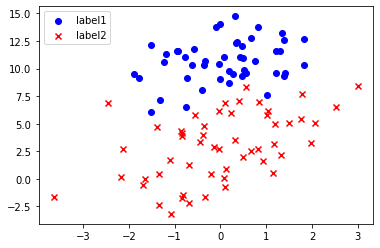

In [19]:
#载入数据
data = np.genfromtxt('C:\\Users\\Administrator\\python课程资料\\机器学习\\程序\\回归\\LR-testSet.csv',delimiter=',')
x_data = data[:,:-1] 
y_data = data[:,-1]  

def plot():
    x0 = []
    y0 = []
    x1 = []
    y1 = []
    
    for i in range(len(x_data)):
        if y_data[i] == 0:
            x0.append(x_data[i,0])
            y0.append(x_data[i,1])
        else:
            x1.append(x_data[i,0])
            y1.append(x_data[i,1])
    scatter0 = plt.scatter(x0,y0,c='b',marker='o')
    scatter1 = plt.scatter(x1,y1,c='r',marker='x')
    
    plt.legend(handles=[scatter0,scatter1],labels=['label1','label2'],loc='best')

plot()
plt.show()
            

In [20]:
logistic = linear_model.LogisticRegression()
logistic.fit(x_data,y_data)

LogisticRegression()

In [21]:
logistic.coef_  #参数是2维的

array([[ 0.85767013, -1.54232428]])

In [22]:
logistic.coef_[0]  #这样写的话，会取到2个参数

array([ 0.85767013, -1.54232428])

In [23]:
logistic.coef_[0][0]  #这样写的话，就取到1个参数

0.8576701301117392

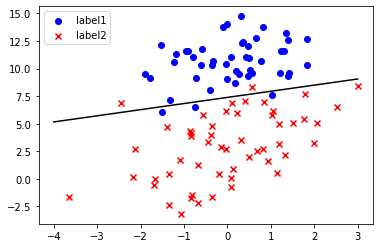

In [24]:
if scale == True:
    plot()
    x_test = np.array([[-4],[3]])
    y_test = (-logistic.intercept_ -x_test*logistic.coef_[0][0])/logistic.coef_[0][1]
    plt.plot(x_test,y_test,'k')
    plt.show()
    

In [25]:
#预测
predictions = logistic.predict(x_data)
print(predictions)

[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1.
 0. 1. 0. 0.]


In [26]:
#使用classification_report计算准确率，召回率和F1值
a = classification_report(y_data,predictions)
print(a)

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95        47
         1.0       0.94      0.96      0.95        53

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100

